Install SystemML Python package and jar file

In [1]:
# pip install --upgrade systemML
!pip install --upgrade https://github.com/niketanpansare/future_of_data/raw/master/systemml-1.1.0-SNAPSHOT-python.tar.gz
! ln -s -f ~/.local/lib/python2.7/site-packages/systemml/systemml-java/*.jar ~/data/libs/

    100% |████████████████████████████████| 10.3MB 97kB/s  eta 0:00:01
    100% |████████████████████████████████| 12.1MB 93kB/s  eta 0:00:01
    100% |████████████████████████████████| 46.7MB 25kB/s  eta 0:00:01
    100% |████████████████████████████████| 24.3MB 47kB/s  eta 0:00:01
    100% |████████████████████████████████| 12.2MB 98kB/s  eta 0:00:01
    100% |████████████████████████████████| 5.9MB 204kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 4.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for systemml ... done
  Stored in directory: /gpfs/fs01/user/s738-0c6a3f55337817-173cb7893244/.cache/pip/wheels/75/ca/50/f14a0f1cec72222376f5ced7749629ca44194d8245c2e4939d
Successfully built systemml


In [6]:
!pip show systemml

Name: systemml
Version: 1.1.0
Summary: Apache SystemML is a distributed and declarative machine learning platform.
Home-page: http://systemml.apache.org/
Author: Apache SystemML
Author-email: dev@systemml.apache.org
License: Apache 2.0
Location: /gpfs/global_fs01/sym_shared/YPProdSpark/user/s738-0c6a3f55337817-173cb7893244/.local/lib/python2.7/site-packages
Requires: Pillow, scikit-learn, pandas, scipy, numpy


Import SystemML API

In [5]:
sc.version

u'2.1.2'

In [7]:
from systemml import MLContext, dml
# create a MLContext object
ml = MLContext(sc)
# And print the information of SystemML version
print(ml.info())

Archiver-Version: Plexus Archiver
Artifact-Id: systemml
Build-Jdk: 1.8.0_121
Build-Time: 2017-09-08 08:50:38 UTC
Built-By: asurve
Created-By: Apache Maven 3.3.9
Group-Id: org.apache.systemml
Main-Class: org.apache.sysml.api.DMLScript
Manifest-Version: 1.0
Minimum-Recommended-Spark-Version: 2.1.0
Version: 0.15.0



In [8]:
# create a DML script for a Hello World example and excute it using MLContext
script = dml("""
print('hello world!');""")
ml.execute(script)

hello world!
SystemML Statistics:
Total execution time:		0.001 sec.
Number of executed Spark inst:	0.




MLResults

In [10]:
# Let's modify the above script to get the Hello World string
script = dml("""
s = 'Hello World'""").output("s")

hello_world_str = ml.execute(script).get("s")
print(hello_world_str)

SystemML Statistics:
Total execution time:		0.000 sec.
Number of executed Spark inst:	0.


Hello World


import numpy, sklearn, and define some helper functions

In [11]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
plt.switch_backend('agg')

Example 1: Matrix Multiplication

systemL script to generate a random matrix, perform matrix multiplication, and compute the sum of the output

In [14]:
script = """
    X = rand(rows=$nr, cols=1000, sparsity=0.5)
    A = t(X) %*% X
    s = sum(A)"""
prog = dml(script).input('$nr', 1e6).output('s')
s = ml.execute(prog).get('s')
print(s)

[Stage 0:>                                                         (0 + 0) / 59]
[Stage 0:>                                                         (0 + 9) / 59]
[Stage 0:>                                                        (0 + 10) / 59]
[Stage 0:========>                                                (9 + 10) / 59]
[Stage 0:==========>                                             (11 + 10) / 59]
[Stage 0:===================>                                    (21 + 10) / 59]
[Stage 0:===========================>                            (29 + 10) / 59]
[Stage 0:=====================================>                  (39 + 10) / 59]
[Stage 0:==============================================>         (49 + 10) / 59]
SystemML Statistics:
Total execution time:		15.714 sec.
Number of executed Spark inst:	2.

                                                                                

62610599901.9


Load diabetes dataset from scikit-learn

In [15]:
%matplotlib inline

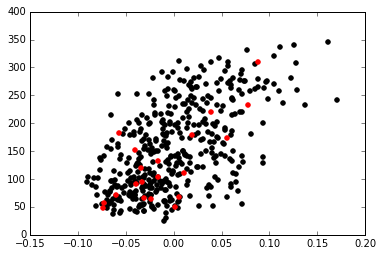

In [18]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = np.matrix(diabetes.target[:-20]).T
diabetes_y_test = np.matrix(diabetes.target[-20:]).T

plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

In [40]:
diabetes_y_train

matrix([[ 151.],
        [  75.],
        [ 141.],
        [ 206.],
        [ 135.],
        [  97.],
        [ 138.],
        [  63.],
        [ 110.],
        [ 310.],
        [ 101.],
        [  69.],
        [ 179.],
        [ 185.],
        [ 118.],
        [ 171.],
        [ 166.],
        [ 144.],
        [  97.],
        [ 168.],
        [  68.],
        [  49.],
        [  68.],
        [ 245.],
        [ 184.],
        [ 202.],
        [ 137.],
        [  85.],
        [ 131.],
        [ 283.],
        [ 129.],
        [  59.],
        [ 341.],
        [  87.],
        [  65.],
        [ 102.],
        [ 265.],
        [ 276.],
        [ 252.],
        [  90.],
        [ 100.],
        [  55.],
        [  61.],
        [  92.],
        [ 259.],
        [  53.],
        [ 190.],
        [ 142.],
        [  75.],
        [ 142.],
        [ 155.],
        [ 225.],
        [  59.],
        [ 104.],
        [ 182.],
        [ 128.],
        [  52.],
        [  37.],
        [ 170.

Example 2: implement three different algorithms to train linear regression model

Algorithm 1: Linear Regression - Direct Solve(no regularization)

In [41]:
script = """
    # add constant feature to X to model intercept
    ones = matrix(1, rows=nrow(X), cols=1)
    X = cbind(X, ones)
    A = t(X) %*% X
    b = t(X) %*% y
    w = solve(A, b)
    bias = as.scalar(w[nrow(w),1])
    w = w[1:nrow(w)-1,]"""

In [42]:
prog = dml(script).input(X=diabetes_X_train, y=diabetes_y_train).output('w', 'bias')
w, bias = ml.execute(prog).get('w', 'bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.001 sec.
Number of executed Spark inst:	2.




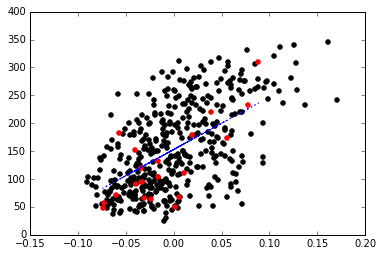

In [44]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+bias, color='blue', linestyle='dotted')

Algorithm 2: Linear Regression - Batch Gradient Descent (no regularization)

Step 1: Start with an  initial point 
while (not converged){
Step 2: Compute gradient dw.
Step 3: Compute stepsize alpha
Step 4: Update: w_new = w_old - alpha*dw
}

In [45]:
script = """
    # add constant feature to X to model intercepts
    ones = matrix(1, rows=nrow(X), cols=1)
    X = cbind(X, ones)
    max_iter = 100
    w = matrix(0, rows=ncol(X), cols=1)
    for(i in 1:max_iter){
        XtX = t(X) %*% X
        dw = XtX %*%w - t(X) %*% y
        alpha = (t(dw) %*% dw) / (t(dw) %*% XtX %*% dw)
        w = w - dw*alpha
    }
    bias = as.scalar(w[nrow(w),1])
    w = w[1:nrow(w)-1,]
    """

In [46]:
prog = dml(script).input(X=diabetes_X_train, y=diabetes_y_train).output('w').output('bias')
w, bias = ml.execute(prog).get('w', 'bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.059 sec.
Number of executed Spark inst:	2.




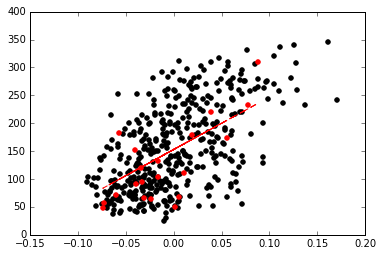

In [47]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+bias, color='red', linestyle='dashed')

Algorithm 3 : Linear Regression - Conjugate Gradient (no regularization)

problem with gradient descent: Takes very similar directions many times
Solution: Enforce conjugacy

Step 1: Start with an initial point
while(not converged) {
    Step 2: Compute gradient dw.
    Step 3: Compute stepsize alpha.
    Step 4: Compute next direction p by enforcing conjugacy with previous direction.
    Step 4: Update: w_new = W_old + alpha*p
}

In [53]:
script = """
    # add constant feature to X to model intercepts
    X = cbind(X, matrix(1, rows=nrow(X), cols=1))
    m = ncol(X); i = 1;
    max_iter = 20;
    w = matrix (0, rows = m, cols = 1); # initialize weights to 0
    dw = - t(X) %*% y; p = - dw;        # dw = (X'X)w - (X'y)
    norm_r2 = sum (dw ^ 2);
    for(i in 1:max_iter) {
        q = t(X) %*% (X %*% p)
        alpha = norm_r2 /sum (p * q);   # Minimizes f(w - alpha*r)
        w = w + alpha * p;              # update weights
        dw = dw + alpha * q;
        old_norm_r2 = norm_r2; norm_r2 = sum (dw ^ 2);
        p = -dw + (norm_r2 / old_norm_r2) * p; #next direction - conjugacy to previous direction
        i = i +1;
    } 
    bias = as.scalar(w[nrow(w),1])
    w = w[1:nrow(w)-1,]
    """
   

In [54]:
prog = dml(script).input(X=diabetes_X_train, y=diabetes_y_train).output('w').output('bias')
w, bias = ml.execute(prog).get('w', 'bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.009 sec.
Number of executed Spark inst:	2.




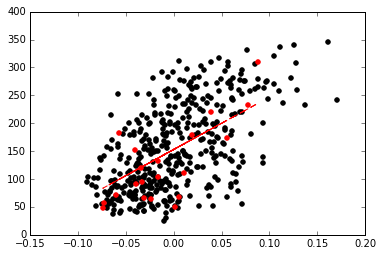

In [55]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+bias, color='red', linestyle='dashed')

Example 3: Invoke existing SystemML algorithm script LinearRegDS.dml using MLContext API

In [56]:
from systemml import dmlFromResource
prog = dmlFromResource('scripts/algoritms/LinearRegDS.dml').input(X=diabetes_X_train, y=diabetes_y_train).input('$icpt', 1.0).output('beta_out')
w = ml.execute(prog).get('beta_out')
w = w.toNumPy()
bias=w[1]

Py4JJavaError: An error occurred while calling z:org.apache.sysml.api.mlcontext.ScriptFactory.dmlFromResource.
: org.apache.sysml.api.mlcontext.MLContextException: InputStream is null
	at org.apache.sysml.api.mlcontext.ScriptFactory.getScriptStringFromInputStream(ScriptFactory.java:381)
	at org.apache.sysml.api.mlcontext.ScriptFactory.scriptFromInputStream(ScriptFactory.java:224)
	at org.apache.sysml.api.mlcontext.ScriptFactory.scriptFromResource(ScriptFactory.java:302)
	at org.apache.sysml.api.mlcontext.ScriptFactory.dmlFromResource(ScriptFactory.java:118)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:785)


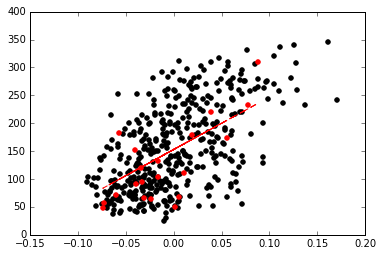

In [57]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+bias, color='red', linestyle='dashed')

Example 4: Invoke existing SystemML Algorithm using scikit-learn/SparkML pipeline like API

mlleanr API allows a Python programmer to invoke SystemML's algorithms using scikit-learn like API as well as Spark's MLPipeline API

In [59]:
from pyspark.sql import SQLContext
from systemml.mllearn import LinearRegression
sqlCtx = SQLContext(sc)

In [61]:
regr = LinearRegression(sqlCtx)
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

Running the CG algorithm...
BEGIN LINEAR REGRESSION SCRIPT
Reading X and Y...
||r|| initial value = 64725.64237405237,  target value = 0.06472564237405237
Iteration 1:  ||r|| / ||r init|| = 0.013822097283108788
Iteration 2:  ||r|| / ||r init|| = 4.205033429162128E-15
Computing the statistics...
The CG algorithm is done.
END LINEAR REGRESSION SCRIPT
Writing the output matrix...
AVG_TOT_Y,153.36255924170615
STDEV_TOT_Y,77.21853383600028
AVG_RES_Y,-6.384782118488863E-13
STDEV_RES_Y,63.03850633759284
DISPERSION,3973.853281274733
R2,0.33513125068675453
ADJUSTED_R2,0.3335482298550564
R2_NOBIAS,0.33513125068675453
ADJUSTED_R2_NOBIAS,0.3335482298550564
SystemML Statistics:
Total execution time:		0.011 sec.
Number of executed Spark inst:	2.




lr

In [62]:
predictions = regr.predict(diabetes_X_test)

[Stage 6:>                                                          (0 + 0) / 2]
                                                                                
SystemML Statistics:
Total execution time:		0.001 sec.
Number of executed Spark inst:	1.




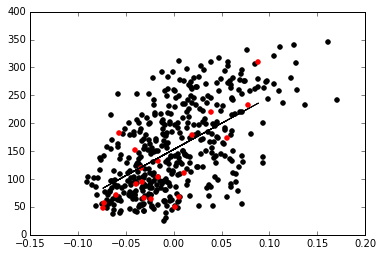

In [64]:
# Use the trained model to perform prediction
%matplotlib inline
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

plt.plot(diabetes_X_test, predictions, color='black')

(Optional) Install OpenBLAS

In [65]:
!wget https://github.com/xianyi/OpenBLAS/archive/v0.2.20.tar.gz
!tar -xzf v0.2.20.tar.gz
!cd OpenBLAS-0.2.20/ && make clean
!cd OpenBLAS-0.2.20/ && make USE_OPENMP=1

--2018-03-14 20:37:48--  https://github.com/xianyi/OpenBLAS/archive/v0.2.20.tar.gz
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/xianyi/OpenBLAS/tar.gz/v0.2.20 [following]
--2018-03-14 20:37:48--  https://codeload.github.com/xianyi/OpenBLAS/tar.gz/v0.2.20
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120, 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11637301 (11M) [application/x-gzip]
Saving to: ‘v0.2.20.tar.gz’

100%[======================================>] 11,637,301  15.4MB/s   in 0.7s   

2018-03-14 20:37:49 (15.4 MB/s) - ‘v0.2.20.tar.gz’ saved [11637301/11637301]

make[1]: Entering directory `/gpfs/global_fs01/sym_shared/YPProdSpark/user/s738-0c6a3f55337817-173cb7893244

Example 5 : invoking a Keras model with SystemML

In [69]:
from mlxtend.data import mnist_data
import numpy as np
from sklearn.utils import shuffle
#downLoad the MNIST dataset
X, y = mnist_data()
X, y = shuffle(X, y)
# Split the data into training and test
n_samples = len(X)
X_train = X[:int(.9 * n_samples)]
y_train = y[:int(.9 * n_samples)]
X_test = X[:int(.9 * n_samples):]
y_test = y[:int(.9 * n_samples):]
from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Dropout, Flatten
from keras import backend as K
from keras.models import Model
input_shape = (1,28,28) if K.image_data_format() == 'channels_first' else (28, 28, 1)
keras_model = Sequential()
keras_model.add(Conv2D(32, kernel_size=(5,2), activation='relu', input_shape=input_shape, padding='same'))
keras_model.add(Maxpooling2D(pool_size=(2,2)))
keras_model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
keras_model.add(Maxpooling2D(pool_size=(2,2)))
keras_model.add(Flatten())
keras_model.add(Dense(512, activation='relu'))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(10, activation='softmax'))

# Scale the input features
scale = 0.00390625
X_train = X_train*scale
X_test = X_test*scale

from systemml.mllearn import Keras2DML
sysml_model = Keras2DML(spark, keras_model, input_shape=(1,28,28), weights='weights_dir')
sysml_model.setConfigProperty('sysml.native.blas', 'openblas')
sysml_model.setConfigProperty('sysml.native.blas.directory', os.path.join(os.getcwd(), 'OpenBLAS-0.2.20/'))

sysml_model.summary()
sysml_model.fit(X_train, y_train)

ImportError: No module named mlxtend.data